In [20]:
library(tidyverse)
library(sf)
library(sp)
library(fuzzyjoin)

In [30]:
temps <-
  fs::dir_ls("project_data/", regexp = "daily*") %>%
  vroom::vroom() %>% 
  janitor::clean_names()

Rows: 2686768 Columns: 8

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): Region, Country, City
dbl (4): Month, Day, Year, AvgTemperature
lgl (1): State


i<U+00A0>Use `spec()` to retrieve the full column specification for this data.
i<U+00A0>Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [31]:
head(temps)

region,country,state,city,month,day,year,avg_temperature
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,Algeria,NA,Algiers,1,1,1995,64.2
Africa,Algeria,NA,Algiers,1,2,1995,49.4
Africa,Algeria,NA,Algiers,1,3,1995,48.8
Africa,Algeria,NA,Algiers,1,4,1995,46.4
Africa,Algeria,NA,Algiers,1,5,1995,47.9
Africa,Algeria,NA,Algiers,1,6,1995,48.7


There are some suspect values in the data such as temperatures below -50 and years before 1995. I'm going to fix them with an assumption or convert them to missing values.

[1]  0 31


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



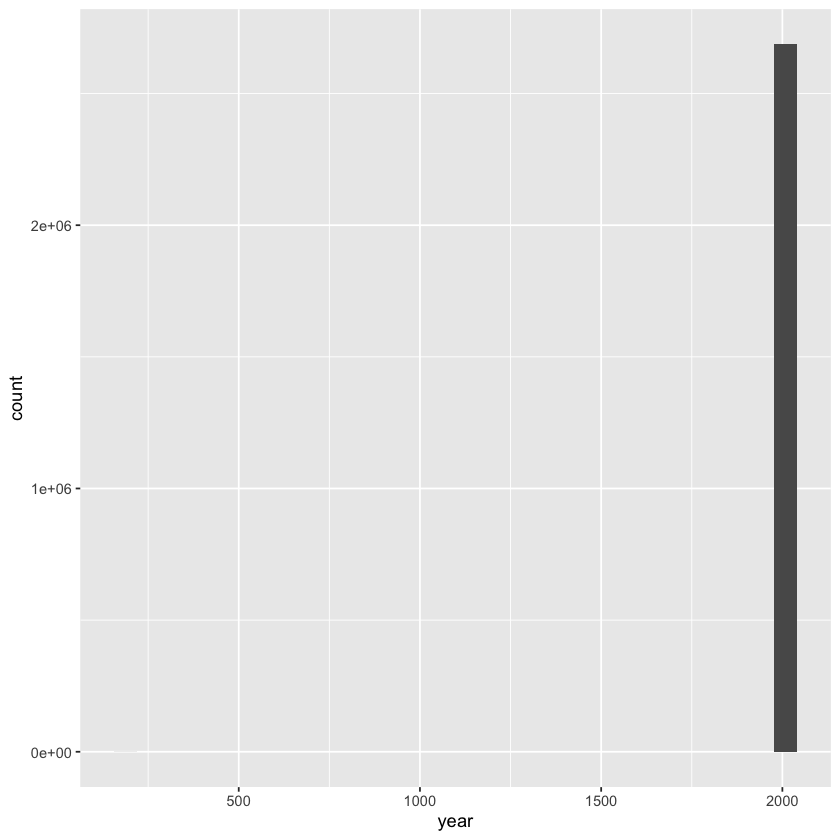

In [43]:
print(range(temps$day))
temps %>%  
 ggplot(aes(x = year)) + 
 geom_histogram()

In [37]:
temps <- 
    temps %>% 
    mutate(day = if_else(day < 1, 1, day), 
            year = if_else(year < 1995, NA_real_, year), 
            avg_temperature = if_else(avg_temperature < -50, NA_real_, avg_temperature)
            )


region,country,state,city,month,day,year,avg_temperature
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,Algeria,NA,Algiers,1,1,1995,64.2
Africa,Algeria,NA,Algiers,1,2,1995,49.4
Africa,Algeria,NA,Algiers,1,3,1995,48.8
Africa,Algeria,NA,Algiers,1,4,1995,46.4
Africa,Algeria,NA,Algiers,1,5,1995,47.9
Africa,Algeria,NA,Algiers,1,6,1995,48.7
Africa,Algeria,NA,Algiers,1,7,1995,48.9
Africa,Algeria,NA,Algiers,1,8,1995,49.1
Africa,Algeria,NA,Algiers,1,9,1995,49.0
